<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/5.%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5.인공신경망활용

##5.1 데이터 다운로드

아래 링크를 클릭하면 구글 드라이브에 저장된 데이콘 천체 데이터가 있다. 눌러서 다운로드 받으면 된다.

출처 : https://dacon.io/competitions/official/235573/data/

https://drive.google.com/open?id=1orMiC9Ssy82jQKJUcaF1Nefy3h3ux5vG # train.csv

https://drive.google.com/open?id=1-wdXDwCYvfeA0OUpPQxShvIgk7qGeHyy # test.csv

https://drive.google.com/open?id=1lyTR6IZdnJ-lG3L3iM_S7_BxyQmtBW_U # submission.csv

##5.2 데이터 불러오기

+ 데이터 설명

최근 인류에게 다가온 빅데이터라는 단어는 우주와 천문학에게 낯설지 않습니다. 찰나의 순간에도 우주는 천문학적인 양의 데이터를 생산해왔고, 오래 전부터 천문학자들은 우주를 관측했으며 그 방대함에 비례하는 데이터를 수집 및 분석했기 때문입니다.

슬론 디지털 천체 관측(Sloan Digital Sky Survey: 이하 SDSS)는 세계적 천체 관측 프로젝트로, 우주에 대한 천문학적인 규모의 데이터를 수집하고 있습니다. 이곳에서 수집한 데이터는 약 6,000개 논문에 사용되었고, 25만 회 이상 인용되었을 정도로 천문학에 큰 기여를 했습니다. 점점 거대해지는 규모에 따라 데이터 처리에는 머신러닝과 딥러닝 기법이 활용되기 시작했습니다.

여전히 우주에는 다양한 미지의 이야기가 남아있고, 오늘날 인간은 하늘에서 많은 데이터를 얻어낼 정도로 발전했습니다. 이 데이터를 분석하여 어쩌면 드러나지 않은 규칙이 여러분의 손끝에서 밝혀질 수 있습니다. 새로운 알고리즘을 통해 우주의 비밀을 찾아주세요!



+ 특징 데이터

ID : UniqueID

psfMag : Point spread function magnitudes : 먼 천체를 한 점으로 가정하여 측정한 빛의 밝기입니다. u,g,r,i,z 5개가 있다.

fiberMag : Fiber magnitudes : 3인치 지름의 광섬유를 사용하여 광스펙트럼을 측정합니다. 광섬유를 통과하는 빛의 밝기입니다. u,g,r,i,z 5개가 있다.

petroMag : Petrosian Magnitudes : 은하처럼 뚜렷한 표면이 없는 천체에서는 빛의 밝기를 측정하기 어렵습니다. 천체의 위치와 거리에 상관없이 빛의 밝기를 비교하기 위한 수치입니다. u,g,r,i,z 5개가 있다.

modelMag : Model magnitudes : 천체 중심으로부터 특정 거리의 밝기입니다. u,g,r,i,z 5개가 있다.

fiverID : 관측에 사용된 광섬유의 구분자

+ 타겟 데이터

type : Source type : 천체의 분류

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
train = pd.read_csv('/content/drive/My Drive/데이터/데이콘 천체 데이터/train.csv', index_col='id')
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [41]:
print(train.shape) # id까지 하면 특성 23개

(199991, 22)


##5.3 데이터 전처리

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   type        199991 non-null  object 
 1   fiberID     199991 non-null  int64  
 2   psfMag_u    199991 non-null  float64
 3   psfMag_g    199991 non-null  float64
 4   psfMag_r    199991 non-null  float64
 5   psfMag_i    199991 non-null  float64
 6   psfMag_z    199991 non-null  float64
 7   fiberMag_u  199991 non-null  float64
 8   fiberMag_g  199991 non-null  float64
 9   fiberMag_r  199991 non-null  float64
 10  fiberMag_i  199991 non-null  float64
 11  fiberMag_z  199991 non-null  float64
 12  petroMag_u  199991 non-null  float64
 13  petroMag_g  199991 non-null  float64
 14  petroMag_r  199991 non-null  float64
 15  petroMag_i  199991 non-null  float64
 16  petroMag_z  199991 non-null  float64
 17  modelMag_u  199991 non-null  float64
 18  modelMag_g  199991 non-null  float64
 19  mo

In [43]:
train.isnull().sum()

type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64

결측치가 하나도 없다.

In [44]:
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


label 값이 범주형 데이터니까 정수로 인코딩 시켜주자.

In [45]:
unique_labels = np.unique(train['type'])
unique_labels

array(['GALAXY', 'QSO', 'REDDEN_STD', 'ROSAT_D', 'SERENDIPITY_BLUE',
       'SERENDIPITY_DISTANT', 'SERENDIPITY_FIRST', 'SERENDIPITY_MANUAL',
       'SERENDIPITY_RED', 'SKY', 'SPECTROPHOTO_STD', 'STAR_BHB',
       'STAR_BROWN_DWARF', 'STAR_CARBON', 'STAR_CATY_VAR', 'STAR_PN',
       'STAR_RED_DWARF', 'STAR_SUB_DWARF', 'STAR_WHITE_DWARF'],
      dtype=object)

In [46]:
class_mapping = {label : idx for idx, label in enumerate(np.unique(train['type']))}
class_mapping

{'GALAXY': 0,
 'QSO': 1,
 'REDDEN_STD': 2,
 'ROSAT_D': 3,
 'SERENDIPITY_BLUE': 4,
 'SERENDIPITY_DISTANT': 5,
 'SERENDIPITY_FIRST': 6,
 'SERENDIPITY_MANUAL': 7,
 'SERENDIPITY_RED': 8,
 'SKY': 9,
 'SPECTROPHOTO_STD': 10,
 'STAR_BHB': 11,
 'STAR_BROWN_DWARF': 12,
 'STAR_CARBON': 13,
 'STAR_CATY_VAR': 14,
 'STAR_PN': 15,
 'STAR_RED_DWARF': 16,
 'STAR_SUB_DWARF': 17,
 'STAR_WHITE_DWARF': 18}

In [0]:
train['type'] = train['type'].map(class_mapping)

In [48]:
np.unique(train['type'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [49]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,,
0,1,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,1,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,1,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,16,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


fiberID가 순서가 있는 범주형 특성인 것 같으니 버리자

In [0]:
y = train[['type']].values
X = train.drop(columns=['fiberID', 'type'])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns, index=train.index)
X_std = X_std.values

In [53]:
print(X_std.shape, y.shape)

(199991, 20) (199991, 1)


##5.4 커스텀 데이터셋 만들기

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [0]:
class MyDataset(Dataset):
  #데이터셋의 전처리를 해주는 부분
  def __init__(self):
    self.x_data = torch.FloatTensor(X_std)
    self.y_data = torch.LongTensor(y) 

  #데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
  def __len__(self):
    return len(self.x_data)
  
  #데이터셋에서 특정 1개의 샘플을 가져오는 함수
  def __getitem__(self, idx):
    x = self.x_data[idx]
    y = self.y_data[idx]
    return x, y

In [0]:
dataset = MyDataset()

In [57]:
# train set 와 validation set로 나누는 비율 정하기

train_val_ratio = 0.8
train_size = int(len(dataset) * train_val_ratio)
val_size = len(dataset) - train_size
print(train_size, val_size)

# train set와 validation set로 나누자

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
print(len(train_dataset), len(val_dataset))

159992 39999
159992 39999


In [0]:
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=512,
                          shuffle=True,
                          drop_last=True)
val_loader = DataLoader(dataset=val_dataset,
                        batch_size=len(val_dataset))

##5.5 모델 학습하기

In [0]:
class MLPModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(20, 512), # input_layer = 20, hidden_layer1 = 512
        nn.ELU(),
        nn.Linear(512, 256), # hidden_layer1 = 512, hidden_layer2 = 256
        nn.ELU(),
        nn.Linear(256, 128), # hidden_layer2 = 256, hidden_layer3 = 128
        nn.ELU(),
        nn.Linear(128, 64), # hidden_layer3 = 128, hidden_layer4 = 64
        nn.ELU(),
        nn.Linear(64, 32), # hidden_layer4 = 64, hidden_layer5 = 32
        nn.ELU(),
        nn.Linear(32,19) # hidden_layer5 = 32, output_layer = 10
        )
  def forward(self, x):
    return self.model(x)

In [60]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [0]:
model = MLPModel().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss() # 여기 소프트맥스 들어가 있다.

In [62]:
plot_list = {'train' : [], 'val' : []}

nb_epochs = 150
for epoch in range(nb_epochs+1):
  
  model.train()
  train_losses = []
  for x_train, y_train in train_loader:
    x_train = x_train.to(device)
    y_train = y_train.squeeze(1) # 2차원을 1차원으로 바꾸자
    y_train = y_train.to(device)

    # H(x) 계산
    hypothesis = model(x_train)

    # train_loss 계산
    train_loss = criterion(hypothesis, y_train)

    # train_cost로 H(x) 개선
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())
  
  model.eval()
  val_losses = []
  for x_val, y_val in val_loader:
    x_val = x_val.to(device)
    y_val = y_val.squeeze(1) # 2차원을 1차원으로 바꾸자
    y_val = y_val.to(device)

    # 학습한 model로 prediction을 해보자
    prediction = model(x_val) 
    val_loss = criterion(prediction, y_val)
    val_losses.append(val_loss.item())
    
  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['val'].append(sum(val_losses)/len(val_losses))
  if epoch % (nb_epochs/10) == 0:
    print(f'Epoch : {epoch}/{nb_epochs}')
    print(f'Train Cost : {sum(train_losses)/len(train_losses)}')
    print(f'Validation Cost : {sum(val_losses)/len(val_losses)}')
    print('-'*50)

correct_prediction = torch.argmax(prediction, dim=1) == y_val # 실제값과 일치하는 경우만 True로 간주
accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
print(f'Accuracy : {accuracy * 100}%')

Epoch : 0/150
Train Cost : 2.778751199062054
Validation Cost : 2.5577707290649414
--------------------------------------------------
Epoch : 15/150
Train Cost : 2.2993308007717133
Validation Cost : 2.3067128658294678
--------------------------------------------------
Epoch : 30/150
Train Cost : 1.8079290989881907
Validation Cost : 1.8182157278060913
--------------------------------------------------
Epoch : 45/150
Train Cost : 1.6539384661576686
Validation Cost : 1.6711105108261108
--------------------------------------------------
Epoch : 60/150
Train Cost : 1.604395249715218
Validation Cost : 1.6005587577819824
--------------------------------------------------
Epoch : 75/150
Train Cost : 1.5769775609175365
Validation Cost : 1.5780593156814575
--------------------------------------------------
Epoch : 90/150
Train Cost : 1.549663272805703
Validation Cost : 1.5499293804168701
--------------------------------------------------
Epoch : 105/150
Train Cost : 1.1518842008633492
Validation 

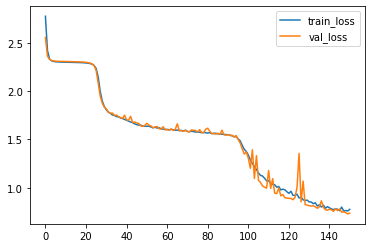

In [63]:
plt.plot(plot_list['train'], label = 'train_loss')
plt.plot(plot_list['val'], label = 'val_loss')
plt.legend()
plt.show()


In [0]:
# 질문 : train_losses , val_lossses 에포크마다 새로 안만들면 메모리 많이 먹나?

# nb_epochs = 100
# train_losses = []
# val_losses = []

# for epoch in range(nb_epochs+1):
#   train_loss_avg = 0
#   """
#   나는 한 epoch 당 cost를 알고 싶다.(712개로 한 바퀴 돌렸을 때의 cost) 
#   근데 여기서 cost는 batch 마다 나온다. (한 배치인 64를 돌렸을 때의 cost) 
#   그래서 각 배치에서의 cost를 모두 더 한후 batch의 수 만큼 나눠 평균을 구할거다.
#   """
#   num_batch = len(train_loader)

#   for x_train, y_train in train_loader:
#     x_train = x_train.to(device)
#     y_train = y_train.squeeze(1) # 2차원을 1차원으로 바꾸자
#     y_train = y_train.to(device)

#     # H(x) 계산
#     hypothesis = model(x_train)

#     # train_loss 계산
#     train_loss = criterion(hypothesis, y_train)

#     # train_cost로 H(x) 개선
#     optimizer.zero_grad()
#     train_loss.backward()
#     optimizer.step()

#     train_loss_avg += train_loss / num_batch
#   train_losses.append(train_loss_avg.item())
      
#   for x_val, y_val in val_loader:
#     x_val = x_val.to(device)
#     y_val = y_val.squeeze(1) # 2차원을 1차원으로 바꾸자
#     y_val = y_val.to(device)

#     # 학습한 model로 prediction을 해보자
#     prediction = model(x_val) 
#     val_loss = criterion(prediction, y_val)
#     val_losses.append(val_loss.item())
    
#   if epoch % (nb_epochs/10) == 0:
#     print(f'Epoch : {epoch}/{nb_epochs}')
#     print(f'Train Cost : {train_loss_avg.item()}')
#     print(f'Validation Cost : {val_loss.item()}')
#     print('-'*50)

# correct_prediction = torch.argmax(prediction, dim=1) == y_val # 실제값과 일치하는 경우만 True로 간주
# accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
# print(f'Accuracy : {accuracy * 100}%')

##5.6 배치 정규화 사용하기

In [0]:
class MLPModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(20, 512), # input_layer = 20, hidden_layer1 = 512
        nn.BatchNorm1d(512),        
        nn.ELU(),
        nn.Linear(512, 256), # hidden_layer1 = 512, hidden_layer2 = 256
        nn.BatchNorm1d(256),
        nn.ELU(),
        nn.Linear(256, 128), # hidden_layer2 = 256, hidden_layer3 = 128
        nn.BatchNorm1d(128),
        nn.ELU(),
        nn.Linear(128, 64), # hidden_layer3 = 128, hidden_layer4 = 64
        nn.BatchNorm1d(64),
        nn.ELU(),
        nn.Linear(64, 32), # hidden_layer4 = 64, hidden_layer5 = 32
        nn.BatchNorm1d(32),
        nn.ELU(),
        nn.Linear(32,19) # hidden_layer5 = 32, output_layer = 10
        )
  def forward(self, x):
    return self.model(x)

In [0]:
model = MLPModel().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss() # 여기 소프트맥스 들어가 있다.

In [67]:
plot_list = {'train' : [], 'val' : []}

nb_epochs = 150
for epoch in range(nb_epochs+1):
  
  model.train()
  train_losses = []
  for x_train, y_train in train_loader:
    x_train = x_train.to(device)
    y_train = y_train.squeeze(1) # 2차원을 1차원으로 바꾸자
    y_train = y_train.to(device)

    # H(x) 계산
    hypothesis = model(x_train)

    # train_loss 계산
    train_loss = criterion(hypothesis, y_train)

    # train_cost로 H(x) 개선
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())
  
  model.eval()
  val_losses = []
  for x_val, y_val in val_loader:
    x_val = x_val.to(device)
    y_val = y_val.squeeze(1) # 2차원을 1차원으로 바꾸자
    y_val = y_val.to(device)

    # 학습한 model로 prediction을 해보자
    prediction = model(x_val) 
    val_loss = criterion(prediction, y_val)
    val_losses.append(val_loss.item())
    
  plot_list['train'].append(sum(train_losses)/len(train_losses))
  plot_list['val'].append(sum(val_losses)/len(val_losses))
  if epoch % (nb_epochs/10) == 0:
    print(f'Epoch : {epoch}/{nb_epochs}')
    print(f'Train Cost : {sum(train_losses)/len(train_losses)}')
    print(f'Validation Cost : {sum(val_losses)/len(val_losses)}')
    print('-'*50)

correct_prediction = torch.argmax(prediction, dim=1) == y_val # 실제값과 일치하는 경우만 True로 간주
accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
print(f'Accuracy : {accuracy * 100}%')

Epoch : 0/150
Train Cost : 1.2993610138312364
Validation Cost : 2.416501760482788
--------------------------------------------------
Epoch : 15/150
Train Cost : 0.6178062935479176
Validation Cost : 3.3338463306427
--------------------------------------------------
Epoch : 30/150
Train Cost : 0.5932080738055401
Validation Cost : 3.3167877197265625
--------------------------------------------------
Epoch : 45/150
Train Cost : 0.5702807642519474
Validation Cost : 3.5066094398498535
--------------------------------------------------
Epoch : 60/150
Train Cost : 0.5558714581032594
Validation Cost : 4.112764358520508
--------------------------------------------------
Epoch : 75/150
Train Cost : 0.5424324360031348
Validation Cost : 3.7464897632598877
--------------------------------------------------
Epoch : 90/150
Train Cost : 0.5402402402116702
Validation Cost : 4.165923118591309
--------------------------------------------------
Epoch : 105/150
Train Cost : 0.5575045531567855
Validation Cos

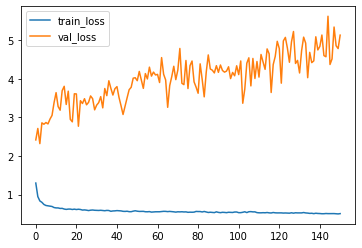

In [68]:
plt.plot(plot_list['train'], label = 'train_loss')
plt.plot(plot_list['val'], label = 'val_loss')
plt.legend()
plt.show()
